In [1]:
import socket
import datetime

print("VIKAS PAL", "Laptop:", socket.gethostname(),"Time:", datetime.datetime.now())

VIKAS PAL Laptop: 9d354ea2ac8f Time: 2022-08-12 02:48:56.527302


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = "/content/gdrive/MyDrive/BUAN6340_PDS/Airbnb_Open_Data.csv"
df = pd.read_csv(path, encoding = 'unicode_escape')

# Dataset is now stored in a Pandas Dataframe
print(df.shape)
df.head()

(102599, 26)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
df['house_rules'].isna().sum()/df.shape[0] * 100

50.810436748896194

In [8]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [9]:
df['NAME']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                                                      NaN
4         Entire Apt: Spacious Studio/Loft by central park
                                ...                       
102594                          Spare room in Williamsburg
102595                       Best Location near Columbia U
102596                      Comfy, bright room in Brooklyn
102597                    Big Studio-One Stop from Midtown
102598                                585 sf Luxury Studio
Name: NAME, Length: 102599, dtype: object

# Text Mining

In [10]:

import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
# stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
# stop = stopwords.words('english')

import nltk
nltk.download('stopwords')

stop = stopwords.words('english')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
def basic_clean(text):
  
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """


  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [12]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [13]:
#Creating the text variable
text_name = " ".join(str(cat) for cat in df.NAME)
print(len(text_name))

3967944


In [14]:
text_house_rules = " ".join(str(cat) for cat in df.house_rules)
print(len(text_house_rules))

14731903


# Word count

In [15]:
text_name_wordcount = WordCloud().process_text(text_name)
text_hourserules_wordcount = WordCloud().process_text(text_house_rules)

In [16]:
d1 = sorted(text_name_wordcount.items())
d2 = sorted(text_hourserules_wordcount.items())

In [17]:
d1 = pd.DataFrame(d1, columns = ['Words','Count'])
d1.sort_values(by = 'Count', ascending= False, inplace= True)

d2 = pd.DataFrame(d2, columns = ['Words','Count'])
d2.sort_values(by = 'Count', ascending= False, inplace= True)

In [18]:
print(d1.shape)
d1.head(20)

(14367, 2)


,Words,Count
8361,Private Room,6192
12421,heart,4162
6897,Manhattan,3209
2541,Brooklyn,3189
7419,NYC,2969
2987,Central Park,2811
4152,East Village,2495
11153,Williamsburg,2222
8319,Private Bedroom,2144
2067,Bedroom Apartment,2090


In [19]:
print(d2.shape)
d2.head(20)

(10195, 2)


,Words,Count
6158,nan nan,36453
8459,smoking,19205
2440,check,9303
6923,pet,8805
7861,respectful,7383
4705,home,7109
9835,will,7083
4486,guest,6349
9074,time,6348
4800,house,5893


In [20]:
delete_words = ['nan nan','nan',' nan ','check', 'use', 'donâ t','apartment','building','thought','least','website', 'min', 'etc','please']

In [21]:
for i in delete_words:
  d1.drop(d1[d1['Words'] == i].index, inplace = True)
  d2.drop(d2[d2['Words'] == i].index, inplace = True)

d2['Words'] = np.where(d2['Words'] == 'nan', '', d2['Words'])

In [22]:
text_names = " ".join(str(cat) for cat in d1.Words)

# remove nan values which are caotured as string
text_house_rules = " ".join(str(cat) for cat in d2.Words)
text_house_rules_1 = text_house_rules.replace(' nan', '')

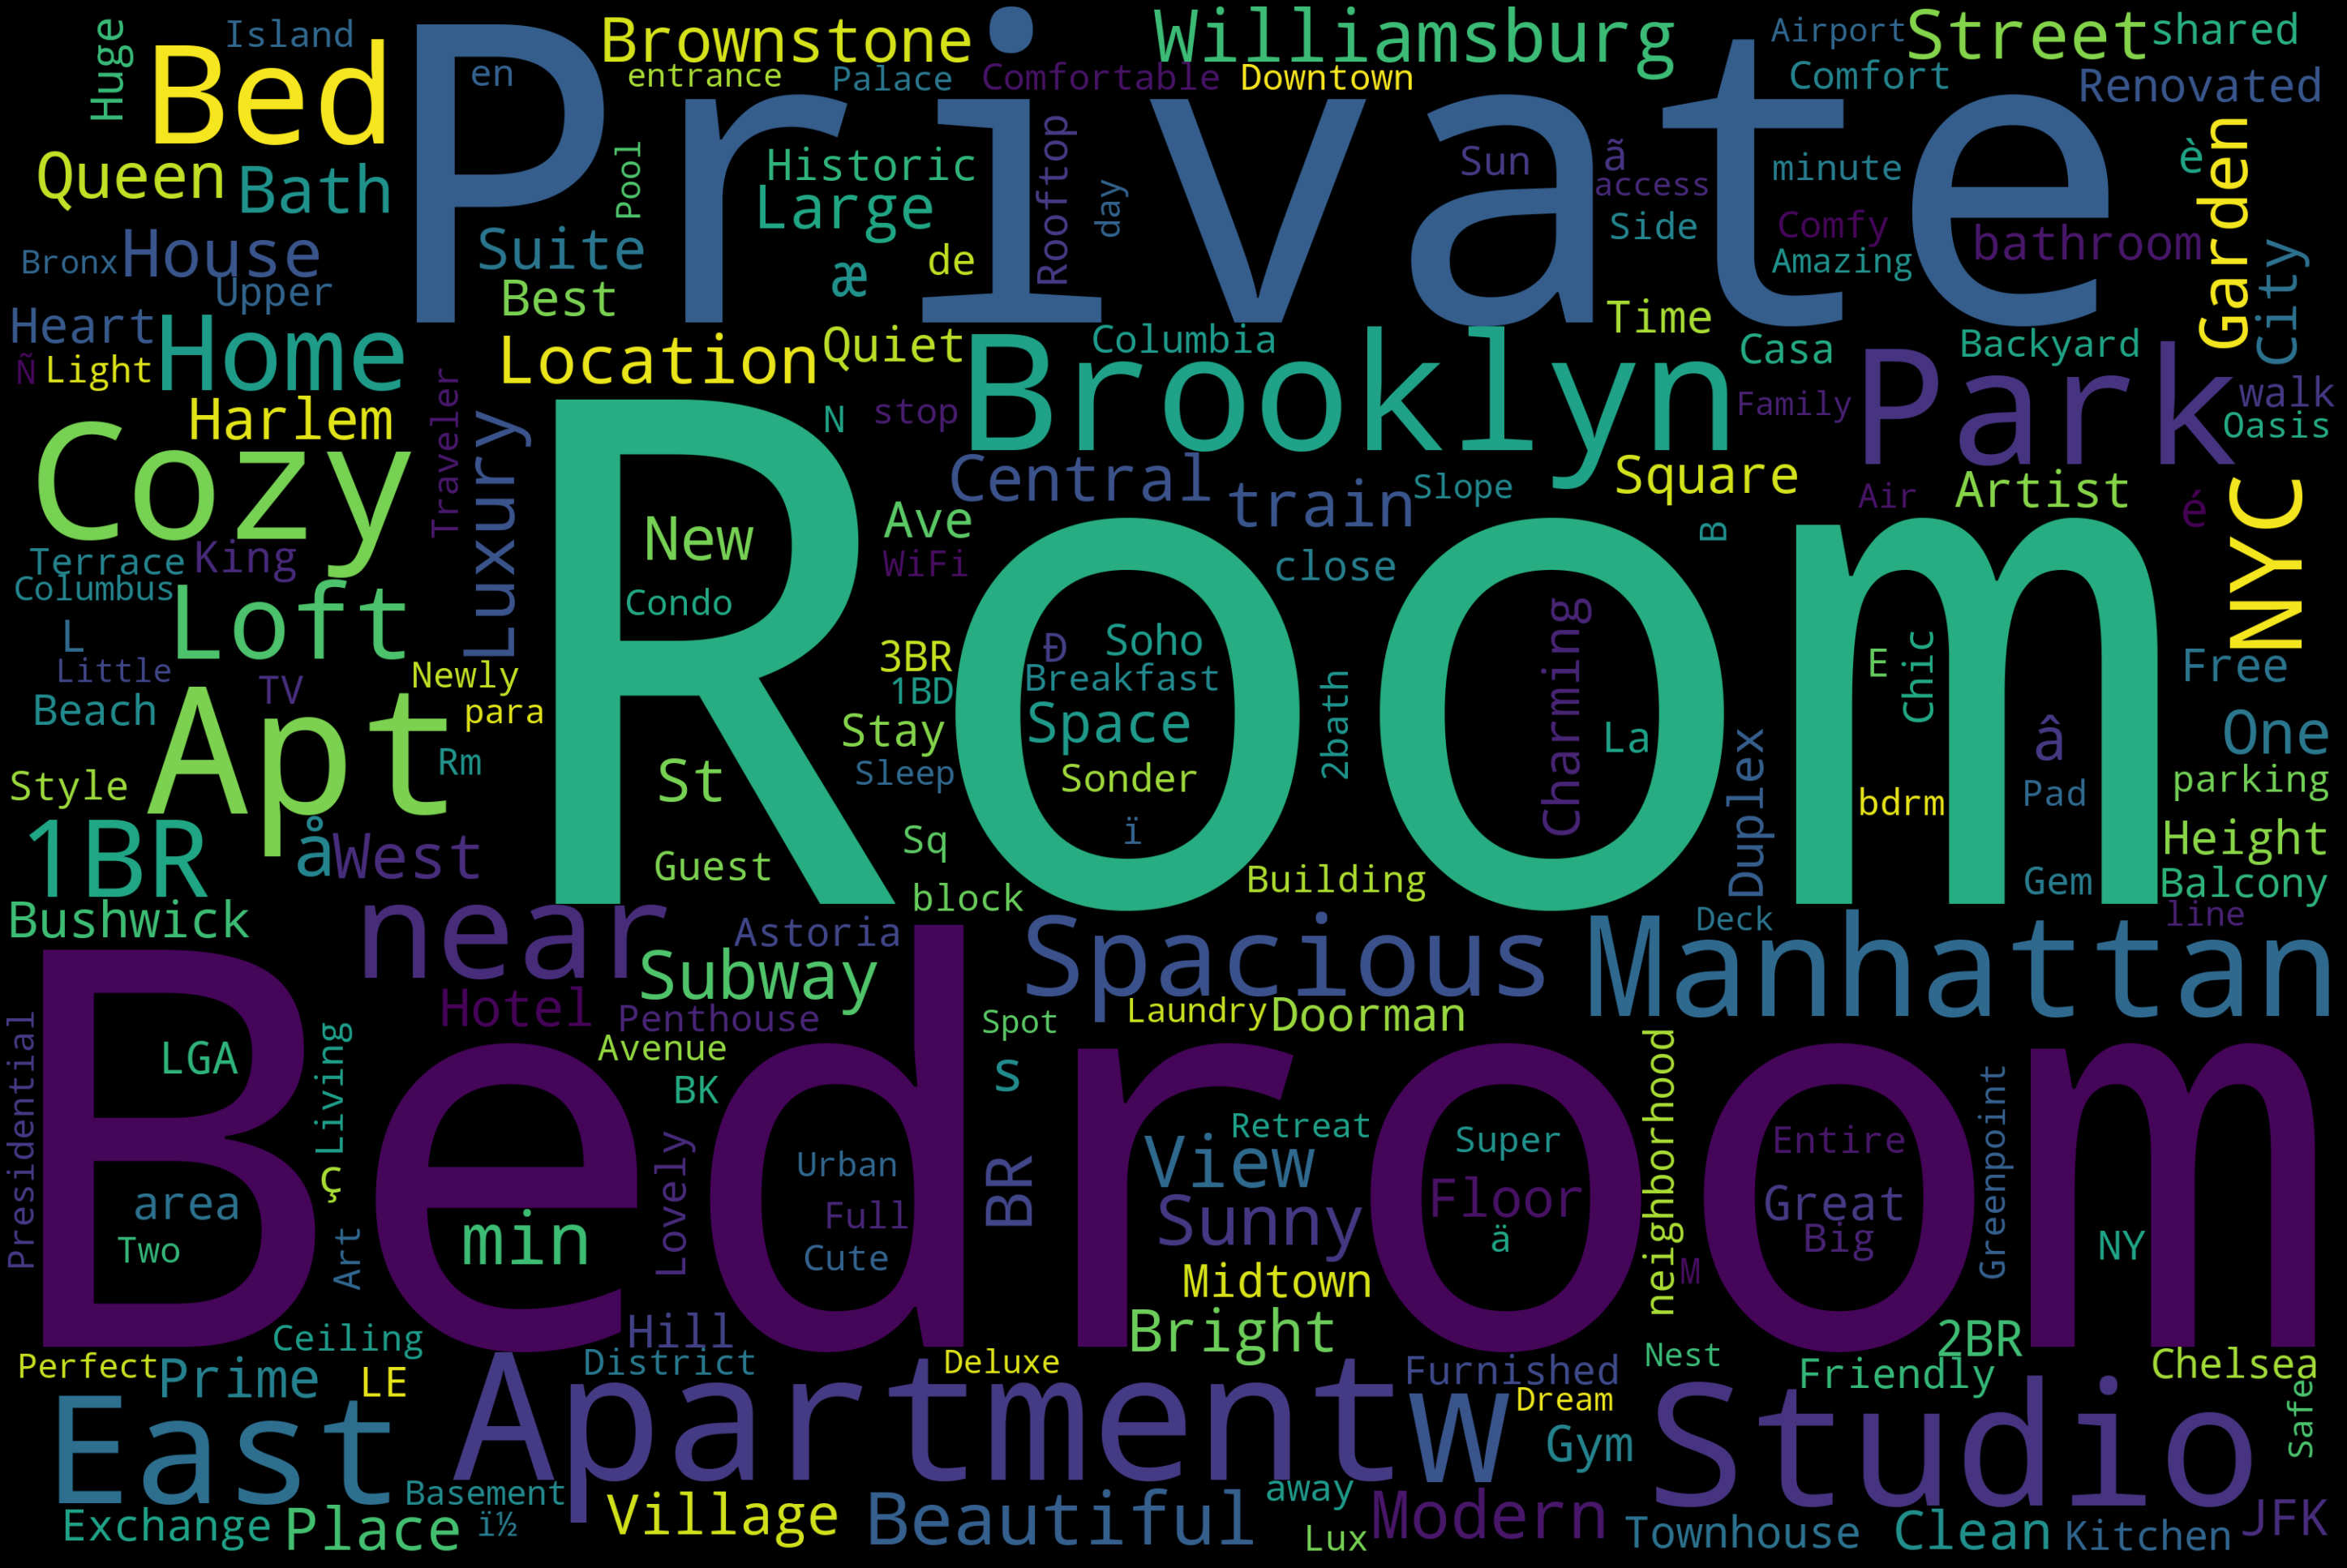

In [23]:
# Word cloud for Names of the Hotels/rooms
generate_word_cloud(text_names)

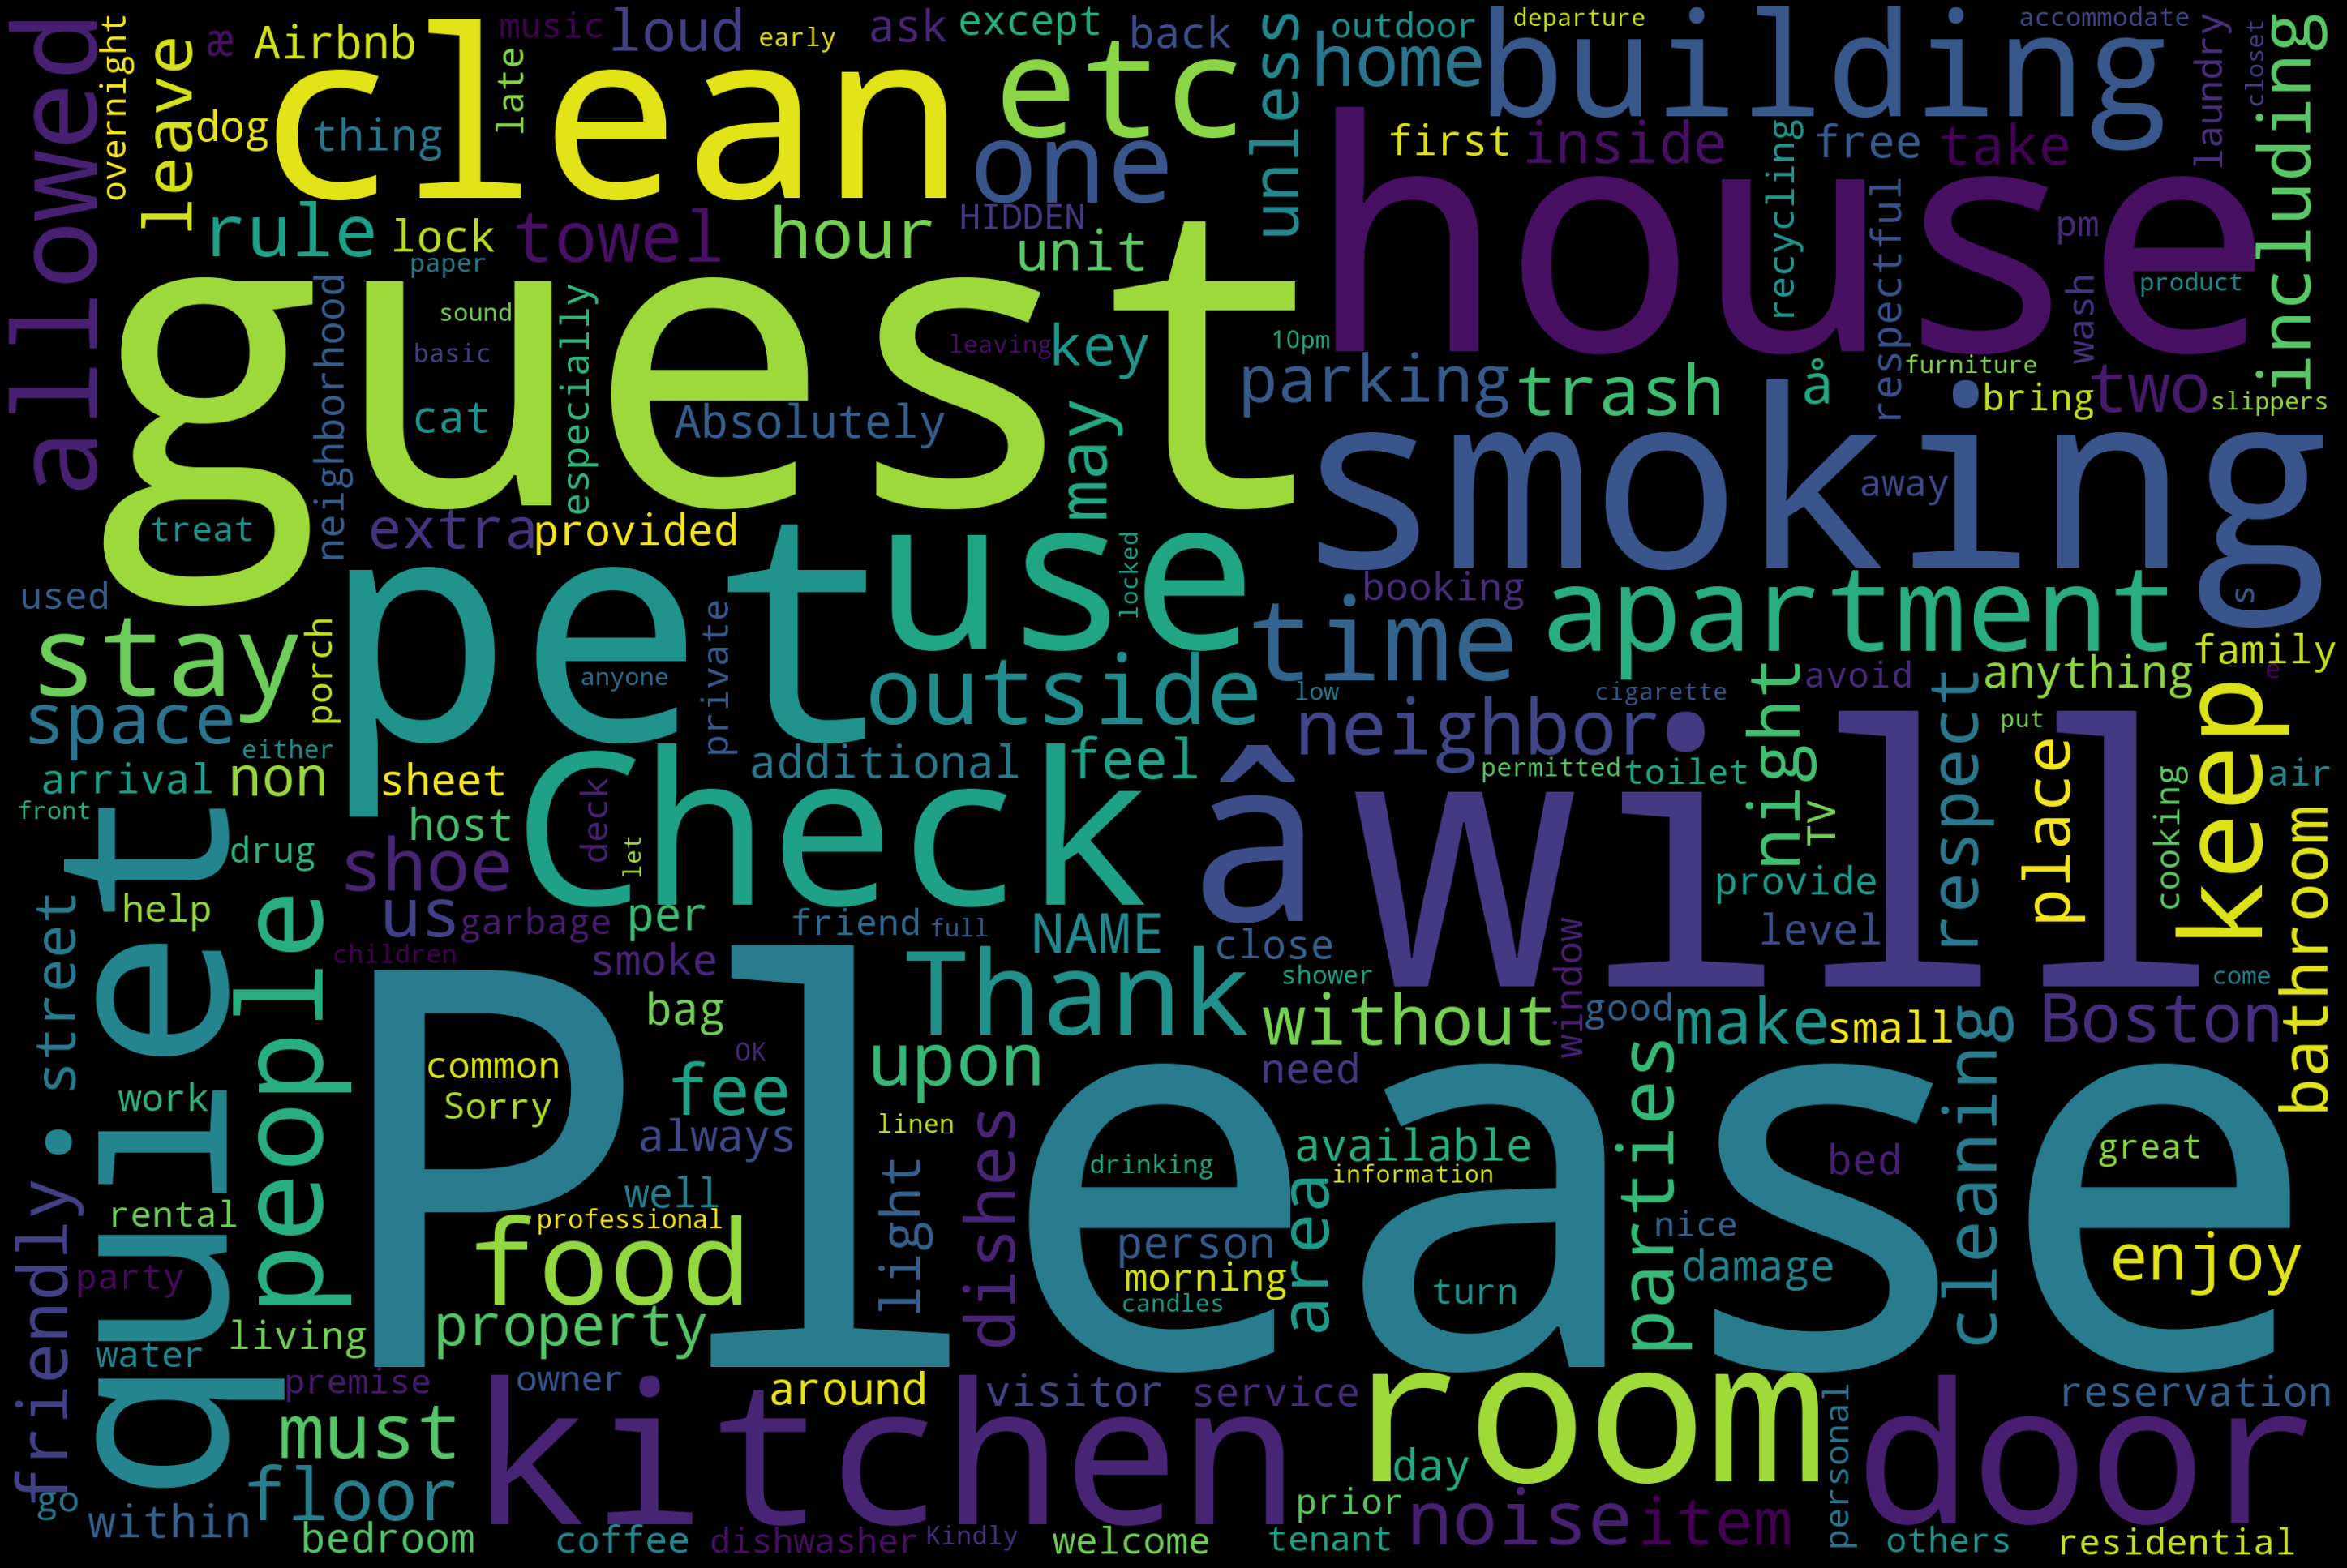

In [24]:
# Word Cloud for Rules of the Airbnb hotels/rooms
generate_word_cloud(text_house_rules_1)

# N-gram

In [25]:
text_names = basic_clean(''.join(str(df['NAME'].tolist())))
text_names_bigrams_series = (pd.Series(nltk.ngrams(text_names, 2)).value_counts())[:20]

In [26]:
text_house_rules = basic_clean(''.join(str(df['house_rules'].tolist())))
# text_house_rules_1 = text_house_rules.replace('nan')
text_house_rules_bigrams_series = (pd.Series(nltk.ngrams(text_house_rules_1, 2)).value_counts())[:20]

In [27]:
# text_house_rules_1 = text_house_rules.remove("nan")

In [28]:
# print(text_house_rules)
# text_house_rules

Text(0.5, 0, '# of Occurances')

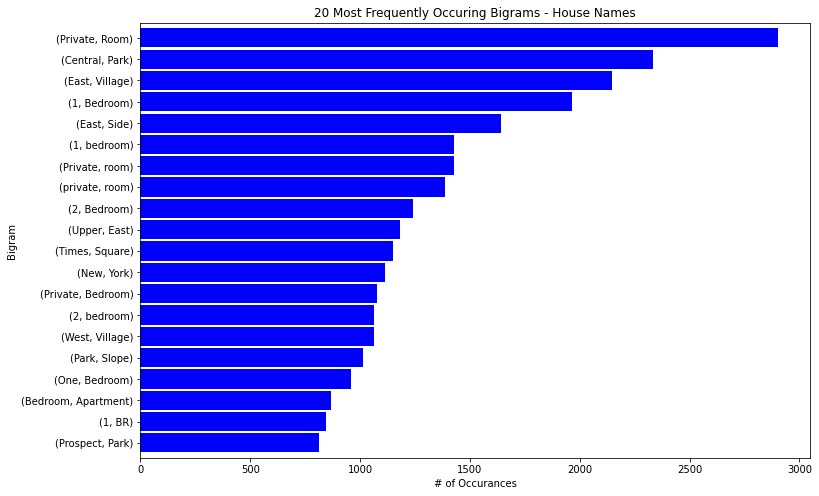

In [29]:
text_names_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams - House Names')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [30]:
text_house_rules_bigrams_series[1:]

(s,  )    2971
(i, n)    2260
(t,  )    1826
(r, e)    1643
(e, s)    1632
(d,  )    1575
(y,  )    1571
(e, r)    1556
(l, e)    1532
(n, g)    1485
( , s)    1461
( , p)    1427
(g,  )    1355
(o, n)    1296
( , c)    1262
(e, a)    1193
(s, e)    1181
(e, n)    1177
(s, t)    1140
dtype: int64

Text(0.5, 0, '# of Occurances')

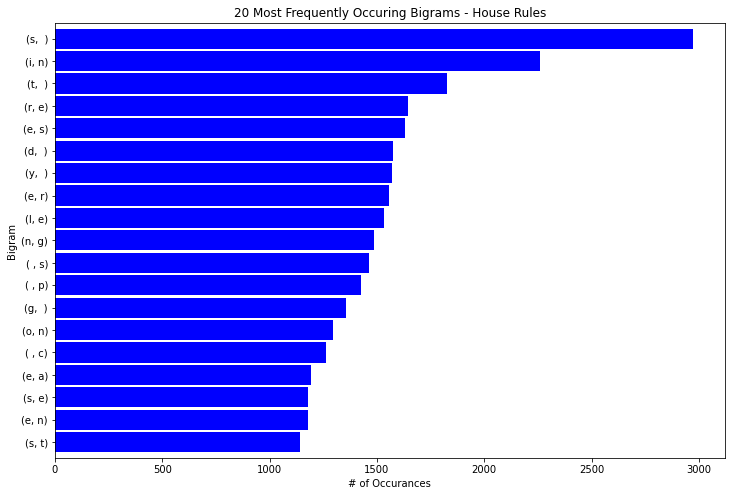

In [31]:
text_house_rules_bigrams_series[1:].sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams - House Rules')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# Trigram

Text(0.5, 0, '# of Occurances')

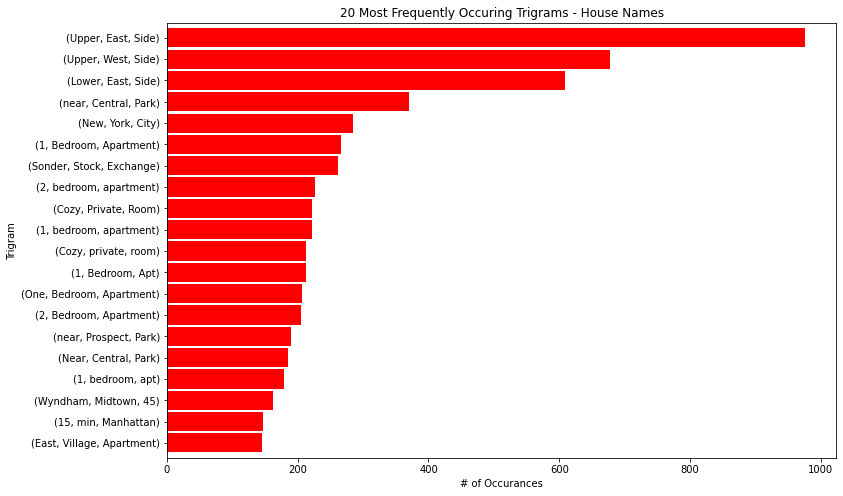

In [32]:
true_trigrams_series = (pd.Series(nltk.ngrams(text_names, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams - House Names')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

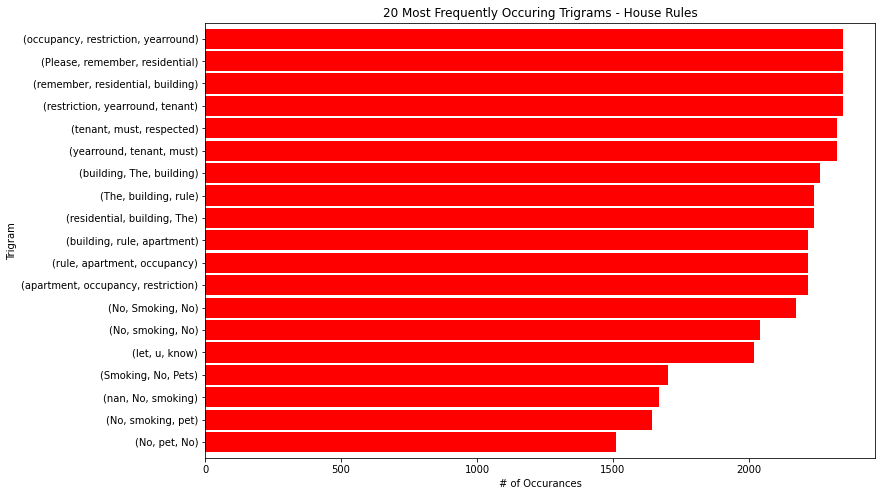

In [33]:
true_trigrams_series = (pd.Series(nltk.ngrams(text_house_rules, 3)).value_counts())[:20]
true_trigrams_series[1:].sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams - House Rules')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')